**TASK:-** Write an ML model to detect anomalies in this data set. The model should learn, and predict anomalies. Structure/process the data, create condition indicators, create an ML model, and create features to train the model.

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import OneClassSVM

### Extracting and understanding the dataframe

In [2]:
# Note:- column names are based on the name of the data file

In [3]:
with open(r"C:\Users\hp\Downloads\data109.txt",newline="") as f:
    read = csv.reader(f)
    data=list(read)

df = pd.DataFrame(data[0],columns = ["col109"])
df["col109"] = pd.to_numeric(df["col109"])

def addnewcol(url,col_name):
    with open(url,newline="") as f:
        read = csv.reader(f)
        data=list(read)
        df[col_name] = data[0]

path = [r"C:\Users\hp\Downloads\data88.txt",r"C:\Users\hp\Downloads\data112.txt",r"C:\Users\hp\Downloads\data0 (1).txt",
        r"C:\Users\hp\Downloads\data89.txt",r"C:\Users\hp\Downloads\data9.txt"]
name = ["col88","col112","col0","col89","col9"]
for i,n in zip(path,name):
    addnewcol(i,n)
    df[n] = pd.to_numeric(df[n])

df.tail()

,col109,col88,col112,col0,col89,col9
9996,0.0,0.0,248.0,248.0,0.0,248.0
9997,0.0,0.0,0.0,128.0,120.0,128.0
9998,0.0,0.0,0.0,0.0,0.0,0.0
9999,0.0,0.0,0.0,0.0,0.0,248.0
10000,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col109  10000 non-null  float64
 1   col88   10000 non-null  float64
 2   col112  10000 non-null  float64
 3   col0    10000 non-null  float64
 4   col89   10000 non-null  float64
 5   col9    10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


In [5]:
df = df.drop(index=10000)

In [6]:
df.describe()

,col109,col88,col112,col0,col89,col9
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,17.273600,15.171200,14.992000,59.864800,14.120000,64.128800
std,54.134431,49.182661,49.176191,82.320701,46.917947,86.357357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,120.000000,0.000000,120.000000
max,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000


### Data Visualization

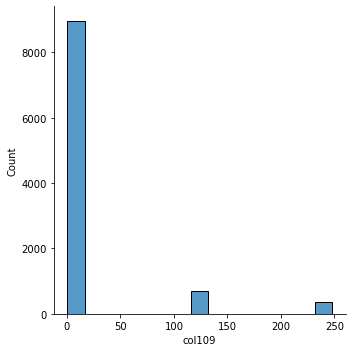

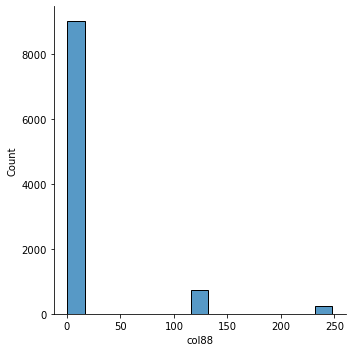

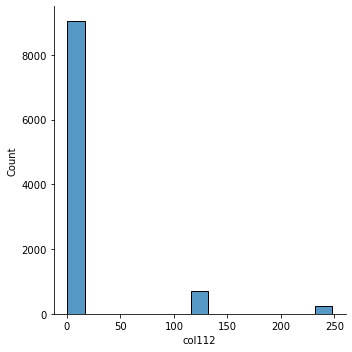

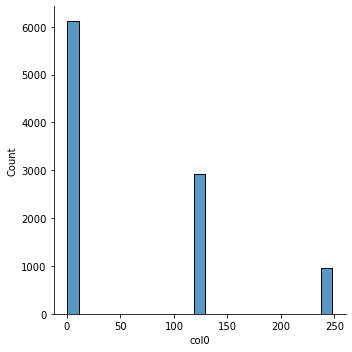

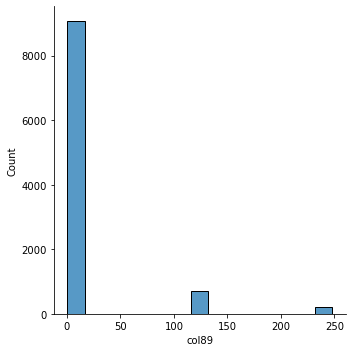

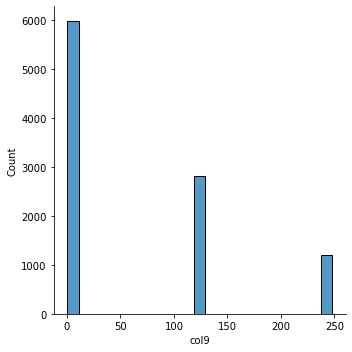

In [7]:
for i in df.columns:
    sns.displot(df[i])
    plt.show()

### Data scaling and normalizing the data

In [8]:
df1 = df.copy()

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
normalized_data = pd.DataFrame(normalize(scaled_data))

In [10]:
normalized_data

,0,1,2,3,4,5
0,-0.131061,-0.126698,0.877063,-0.298694,-0.123612,-0.305012
1,-0.264409,-0.255608,-0.252622,-0.602600,-0.249380,0.612876
2,-0.136773,-0.132220,-0.130676,-0.311711,-0.128999,0.912650
3,-0.131061,-0.126698,0.877063,-0.298694,-0.123612,-0.305012
4,0.868802,-0.131024,-0.129493,-0.308891,-0.127832,-0.315425
...,...,...,...,...,...,...
9995,-0.128617,-0.124336,-0.122883,0.921188,-0.121306,-0.299324
9996,-0.055976,-0.054113,0.831206,0.400917,-0.052794,0.373514
9997,-0.124066,-0.119937,-0.118536,0.321815,0.877444,0.287574
9998,-0.264008,-0.255221,-0.252240,-0.601688,-0.249003,-0.614416


### Anomaly Detection

#### Isolation forest

In [11]:
model = IsolationForest(n_estimators=100
                        ,max_samples="auto",random_state=2)
model.fit(normalized_data)

IsolationForest(random_state=2)

In [12]:
df1["anomaly"] = model.predict(normalized_data)
df1["anomaly_score"]=model.decision_function(normalized_data)

In [13]:
df1.head()

,col109,col88,col112,col0,col89,col9,anomaly,anomaly_score
0,0.0,0.0,120.0,0.0,0.0,0.0,-1,-0.053725
1,0.0,0.0,0.0,0.0,0.0,128.0,-1,-0.004287
2,0.0,0.0,0.0,0.0,0.0,248.0,1,0.037387
3,0.0,0.0,120.0,0.0,0.0,0.0,-1,-0.053725
4,128.0,0.0,0.0,0.0,0.0,0.0,-1,-0.009584


In [14]:
anomaly_value = df1.iloc[np.where(df1["anomaly"] == -1)]

In [15]:
anomaly_value.head()

,col109,col88,col112,col0,col89,col9,anomaly,anomaly_score
0,0.0,0.0,120.0,0.0,0.0,0.0,-1,-0.053725
1,0.0,0.0,0.0,0.0,0.0,128.0,-1,-0.004287
3,0.0,0.0,120.0,0.0,0.0,0.0,-1,-0.053725
4,128.0,0.0,0.0,0.0,0.0,0.0,-1,-0.009584
5,0.0,0.0,0.0,0.0,0.0,128.0,-1,-0.004287


#### Oneclass SVM

In [16]:
svm = OneClassSVM(kernel = "rbf",gamma = 0.001,nu=0.05).fit(normalized_data)
y_pred = model.predict(normalized_data)

In [17]:
anomaly_valsvm = df1.iloc[np.where(y_pred == -1)]

In [18]:
anomaly_valsvm.head()

,col109,col88,col112,col0,col89,col9,anomaly,anomaly_score
0,0.0,0.0,120.0,0.0,0.0,0.0,-1,-0.053725
1,0.0,0.0,0.0,0.0,0.0,128.0,-1,-0.004287
3,0.0,0.0,120.0,0.0,0.0,0.0,-1,-0.053725
4,128.0,0.0,0.0,0.0,0.0,0.0,-1,-0.009584
5,0.0,0.0,0.0,0.0,0.0,128.0,-1,-0.004287


### Clustering - Kmeans

In [19]:
df2 = df.copy()

In [20]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, random_state=0)

In [21]:
inertia = []
for i in range(1,20):
    km=KMeans(n_clusters=i,init = 'k-means++',n_init=10)
    km.fit(normalized_data)
    inertia.append(km.inertia_)

In [22]:
km = KMeans(n_clusters=2, random_state=0)
kmmodel = km.fit(normalized_data)

In [23]:
scaled_cluster = km.fit_predict(normalized_data)
df2['group'] = scaled_cluster

In [24]:
df2.head()

,col109,col88,col112,col0,col89,col9,group
0,0.0,0.0,120.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,128.0,1
2,0.0,0.0,0.0,0.0,0.0,248.0,1
3,0.0,0.0,120.0,0.0,0.0,0.0,1
4,128.0,0.0,0.0,0.0,0.0,0.0,1


In [26]:
x = df2.iloc[:,0:6]
y = df2.iloc[:,-1]

### Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=12)

In [28]:
# Scaling the x train and xtest data
xtrain_scaled = scaler.fit_transform(x_train)
xtest_scaled = scaler.fit_transform(x_test)

### Model Building And accuracy test

#### RandomForest Classifier

In [29]:
rfc = RandomForestClassifier(bootstrap = False,
                             criterion = 'entropy',
                             max_depth = None,
                             max_features = 2,
                             min_samples_leaf = 1,
                             min_samples_split = 5,
                             n_estimators = 100)
rfc.fit(xtrain_scaled,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=2,
                       min_samples_split=5)

In [30]:
predict_rfc = rfc.predict(xtest_scaled)

In [31]:
acc_rfc = round( metrics.accuracy_score(y_test, predict_rfc) * 100 , 2 )
print( 'RFC model accuracy : ', acc_rfc )

RFC model accuracy :  100.0


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


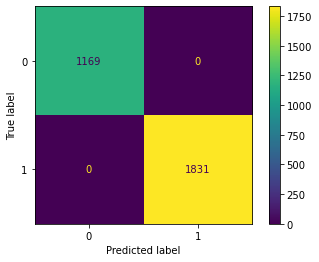

In [32]:
plot_confusion_matrix(rfc, xtest_scaled, y_test, values_format='d')

#### KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
er = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain_scaled,y_train)
    pred_new = knn.predict(xtest_scaled)
    er.append(np.mean(pred_new !=y_test))

Text(0, 0.5, 'error')

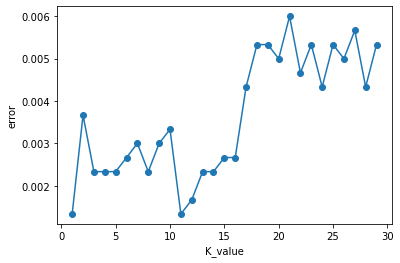

In [34]:
plt.plot(range(1,30), er, marker='o')
plt.xlabel('K_value')
plt.ylabel('error')

In [35]:
knn = KNeighborsClassifier(n_neighbors = 3) 

In [36]:
knn.fit(xtrain_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
predict_knn = knn.predict((xtest_scaled))

In [38]:
accuracy_score(y_test,predict_knn)

0.9976666666666667

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


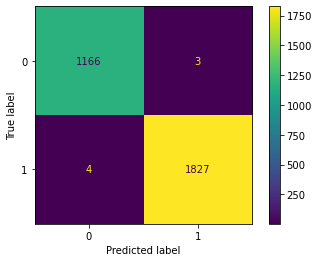

In [39]:
plot_confusion_matrix(knn, xtest_scaled, y_test, values_format='d')

### Conclusion
- to detect the anomalies Isolation forest and Oneclass SVM is used
- for clustering Kmeans clustering is used
- RFC and KNN are used as predictive models giving 100% and 99.77% accuracy respectively